# Compare Manual to Automatic Meander Characterization

In this code we will compare the manual to the automatic detection


## Start Script
### Importing Packages

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [2]:
# Importing Packages
import os

# Importing pyMeander Packages
from WigglyRivers import RiverDatasets
from WigglyRivers import RiverFunctions as RF
from WigglyRivers import ExtractNHDPlusHRData as NHD
from WigglyRivers.utilities import utilities as utl
from WigglyRivers.utilities import filesManagement as FM
from WigglyRivers import Logger
from WigglyRivers import WaveletTreeFunctions as WTFunc

In [3]:
# Start Logger
logger = Logger(console=True)

2024-01-31 19:37:47,003[INFO] set_logger: Starting log


In [4]:
# Parameters
path_projects = './meander_comparison/characterization/manual_resampled/'
projects = utl.get_folders(path_projects)
path_projects_all = [f'{path_projects}{p}/' for p in projects]
path_projects_c = './meander_comparison/characterization/manual_corrected/'
path_projects_out = [f'{path_projects_c}{p}/' for p in projects]

print(projects)

# Current projection of information
projection = 'esri:102003'

['1404', '1206', '1208', '1002', '1402', '0601', '1113', '0808', '1108', '1305', '1017', '0904', '0107', '1021', '0106', '1030', '1202', '1006', '0510', '0714', '1009', '1406', '0803', '1110', '0406', '0408', '1701', '0412', '1307', '0701', '0708', '0307', '0104', '0504', '1211']


### Look for inconsistencies to erase

In [182]:
# Select project to load
project = '1211'
try:
    i_p = projects.index(project)
except ValueError:
    raise ValueError(f'Project "{project}" not found')
project_to_load = path_projects_all[i_p]
print('Set project to load: ' + project_to_load)

Set project to load: ./meander_comparison/characterization/manual_resampled/1211/


In [183]:
# Start Rivers object
rivers = RiverDatasets(logger=logger)
river_network_file = f'{project_to_load}/rivers_manual.hdf5'
kwargs_resample = {f'{project}_0': {'smooth': 1e1}}
# kwargs_resample = {f'{project}_0': {'smooth': 2}}
kwargs_resample = None
rivers.load_river_network(
    river_network_file,
    fn_meanders_database=f'{project_to_load}/meander_database_manual.feather',
    kwargs_resample=kwargs_resample, recalculate_inflection_points=False)
id_rivers = rivers.id_values

# Select River
id_river = id_rivers[0]
river = rivers[id_river]
river.data_source


2024-01-31 20:13:51,391[INFO] info: Start Logger in RiverDatasets


'resample'

In [184]:
# Check meanders that will later be removed
import dotenv
satellite_figure = True
dotenv.load_dotenv()
MAPBOX_TOKEN = os.environ['MAPBOX_TOKEN']
rivers[id_river].interactive_meander_characterization_plot(
    mapbox_token=MAPBOX_TOKEN, current_crs='esri:102003', zoom=7)


FigureWidget({
    'data': [{'lat': array([29.99440429, 29.99443041, 29.99444199, ..., 29.28841953, 29.28831669,
                            29.28821517]),
              'line': {'color': 'blue', 'width': 2},
              'lon': array([-100.22442469, -100.22464152, -100.22485744, ...,  -99.9494819 ,
                             -99.94932036,  -99.94912944]),
              'mode': 'lines',
              'name': 'River',
              'type': 'scattermapbox',
              'uid': '3dd554c7-7631-48cc-b354-16ce188292e3'},
             {'hovertemplate': ('<b>Meander ID: 1</b><br>Lambda' ... '_fm: 1.26<br>Radius_hm: 675.54'),
              'lat': [29.293856793731155],
              'lon': [-100.03636949833573],
              'marker': {'color': 'red', 'size': 10},
              'mode': 'markers',
              'name': 'Meander 1',
              'showlegend': False,
              'type': 'scattermapbox',
              'uid': 'a72fa1b6-8500-48d7-9c19-4d1192bd5537'},
             {'hovertempla

In [185]:
# Remove meander
if project == '0104':
    meanders_to_remove = [1, 18, 32, 13, 16]
elif project == '0106':
    meanders_to_remove = [0, 19]
elif project == '0107':
    meanders_to_remove = []
elif project == '0307':
    meanders_to_remove = [10, 21]
elif project == '0406':
    meanders_to_remove = [55]
elif project == '0412':
    meanders_to_remove = [12]
elif project == '0510':
    meanders_to_remove = [4]
elif project == '0701':
    meanders_to_remove = [23]
elif project == '0714':
    meanders_to_remove = []
elif project == '0803':
    meanders_to_remove = []
elif project == '0904':
    meanders_to_remove = [0]
elif project == '1002':
    meanders_to_remove = []
elif project == '1006':
    meanders_to_remove = [3, 8, 12, 13]
elif project == '1009':
    meanders_to_remove = []
elif project == '1017':
    meanders_to_remove = [8]
elif project == '1021':
    meanders_to_remove = [6, 2]
elif project == '1030':
    meanders_to_remove = []
elif project == '1108':
    meanders_to_remove = []
elif project == '1110':
    meanders_to_remove = []
elif project == '1113':
    meanders_to_remove = [9, 10]
elif project == '1202':
    meanders_to_remove = []
elif project == '1206':
    meanders_to_remove = [2, 7]
elif project == '1208':
    meanders_to_remove = [17, 13]
elif project == '1404':
    meanders_to_remove = []
elif project == '1406':
    meanders_to_remove = []
elif project == '1701':
    meanders_to_remove = [6, 1, 0, ]
else:
    meanders_to_remove = []

for id_m in meanders_to_remove:
    river.remove_meander(id_m)


# Save new information

In [186]:
rivers.save_rivers(
    path_output=f'{path_projects_c}{project}/', file_name='rivers_manual.hdf5',
    fn_meander_database='meander_database_manual.feather')

2024-01-31 20:14:03,856[INFO] info: Saving 1211_0
2024-01-31 20:14:03,858[INFO] info: 1211_0 No CWT poly or ZC lines extracted
2024-01-31 20:14:03,858[INFO] info: 1211_0 No tree scales extracted


## Work with New datasets

In [126]:
# Work with new dataset
# Select project to load
project = '1006'
try:
    i_p = projects.index(project)
except ValueError:
    raise ValueError(f'Project "{project}" not found')
project_to_load = path_projects_out[i_p]
print('Set project to load: ' + project_to_load)

# Start Rivers object
rivers = RiverDatasets(logger=logger)
river_network_file = f'{project_to_load}/rivers_manual.hdf5'
rivers.load_river_network(
    river_network_file,
    fn_meanders_database=f'{project_to_load}/meander_database_manual.feather')
id_rivers = rivers.id_values

# Select River
id_river = id_rivers[0]
river = rivers[id_river]


2024-01-25 16:31:40,196[INFO] info: Start Logger in RiverDatasets


Set project to load: ./meander_comparison/characterization/manual_corrected/1006/


In [143]:
# Check meanders that will later be removed
import dotenv
satellite_figure = True
dotenv.load_dotenv()
MAPBOX_TOKEN = os.environ['MAPBOX_TOKEN']
rivers[id_river].interactive_meander_characterization_plot(
    mapbox_token=MAPBOX_TOKEN, current_crs='esri:102003', zoom=7)

FigureWidget({
    'data': [{'lat': array([48.15793393, 48.15792984, 48.15792566, ..., 47.98093314, 47.98094011,
                            47.98094706]),
              'line': {'color': 'blue', 'width': 2},
              'lon': array([-104.90947761, -104.90946394, -104.90945044, ..., -103.98579594,
                            -103.9857921 , -103.98578821]),
              'mode': 'lines',
              'name': 'River',
              'type': 'scattermapbox',
              'uid': 'cf8ded4e-d652-431c-9158-c1716f9d13fa'},
             {'hovertemplate': ('<b>Meander ID: 1</b><br>Lambda' ... '_fm: 1.61<br>Radius_hm: 800.93'),
              'lat': [48.03453919445645],
              'lon': [-104.20830972143195],
              'marker': {'color': 'red', 'size': 10},
              'mode': 'markers',
              'name': 'Meander 1',
              'showlegend': False,
              'type': 'scattermapbox',
              'uid': 'bcb78370-79dd-47d4-b8ff-a6ae26ab42bd'},
             {'hovertemplat

In [165]:
# Remove possible errors
river.remove_meander(2)

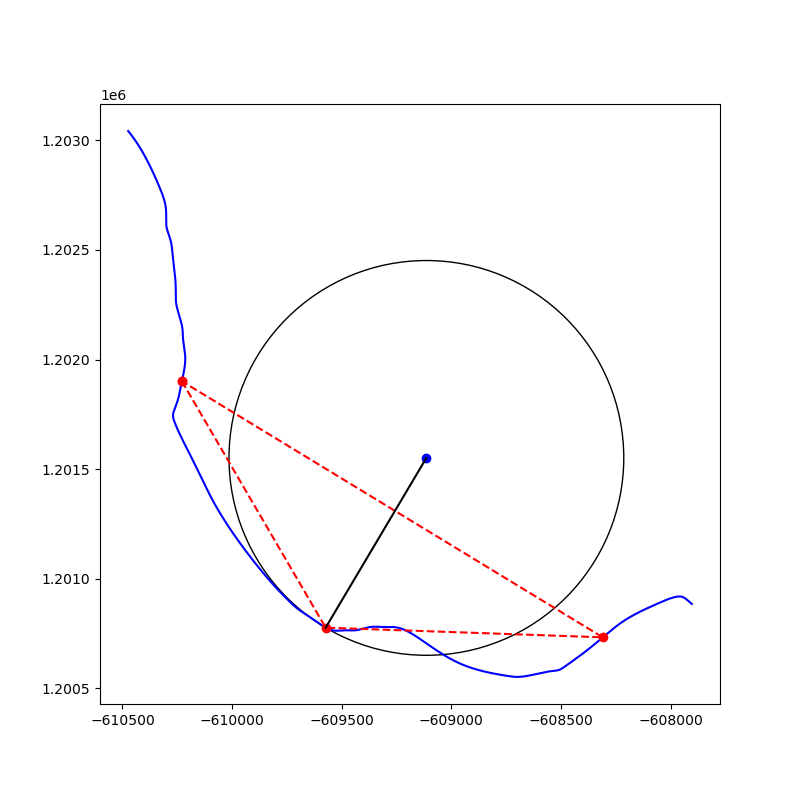

In [139]:
# Look at individual meanders
id_meander = 12
f = river.meanders[id_meander].plot_meander()

In [144]:
# Save Final characterization
rivers.save_rivers(
    path_output=f'{path_projects_c}{project}/', file_name='rivers_manual_corrected.hdf5',
    fn_meander_database='meander_database_manual_corrected.feather')

2024-01-25 16:36:53,576[INFO] info: Saving 1006_0
2024-01-25 16:36:53,576[INFO] info: Saving 1006_0
2024-01-25 16:36:53,586[INFO] info: 1006_0 No CWT poly or ZC lines extracted
2024-01-25 16:36:53,586[INFO] info: 1006_0 No CWT poly or ZC lines extracted
2024-01-25 16:36:53,589[INFO] info: 1006_0 No tree scales extracted
2024-01-25 16:36:53,589[INFO] info: 1006_0 No tree scales extracted
